In [1]:
from duneanalytics import DuneAnalytics
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

2022-09-19 01:28:27,262 : INFO : _init_num_threads : Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-09-19 01:28:27,262 : INFO : _init_num_threads : NumExpr defaulting to 8 threads.


In [2]:
# load env variables for dune
load_dotenv()

True

In [3]:
# initialize client
dune = DuneAnalytics(os.getenv('DUNE_USER'), os.getenv('DUNE_PASSWORD'))

# try to login
dune.login()

# fetch token
dune.fetch_auth_token()

In [4]:
result_id = dune.query_result_id(query_id=1280328)

In [5]:
# fetch query result
data = dune.query_result(result_id)

In [7]:
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df = pd.DataFrame(data)

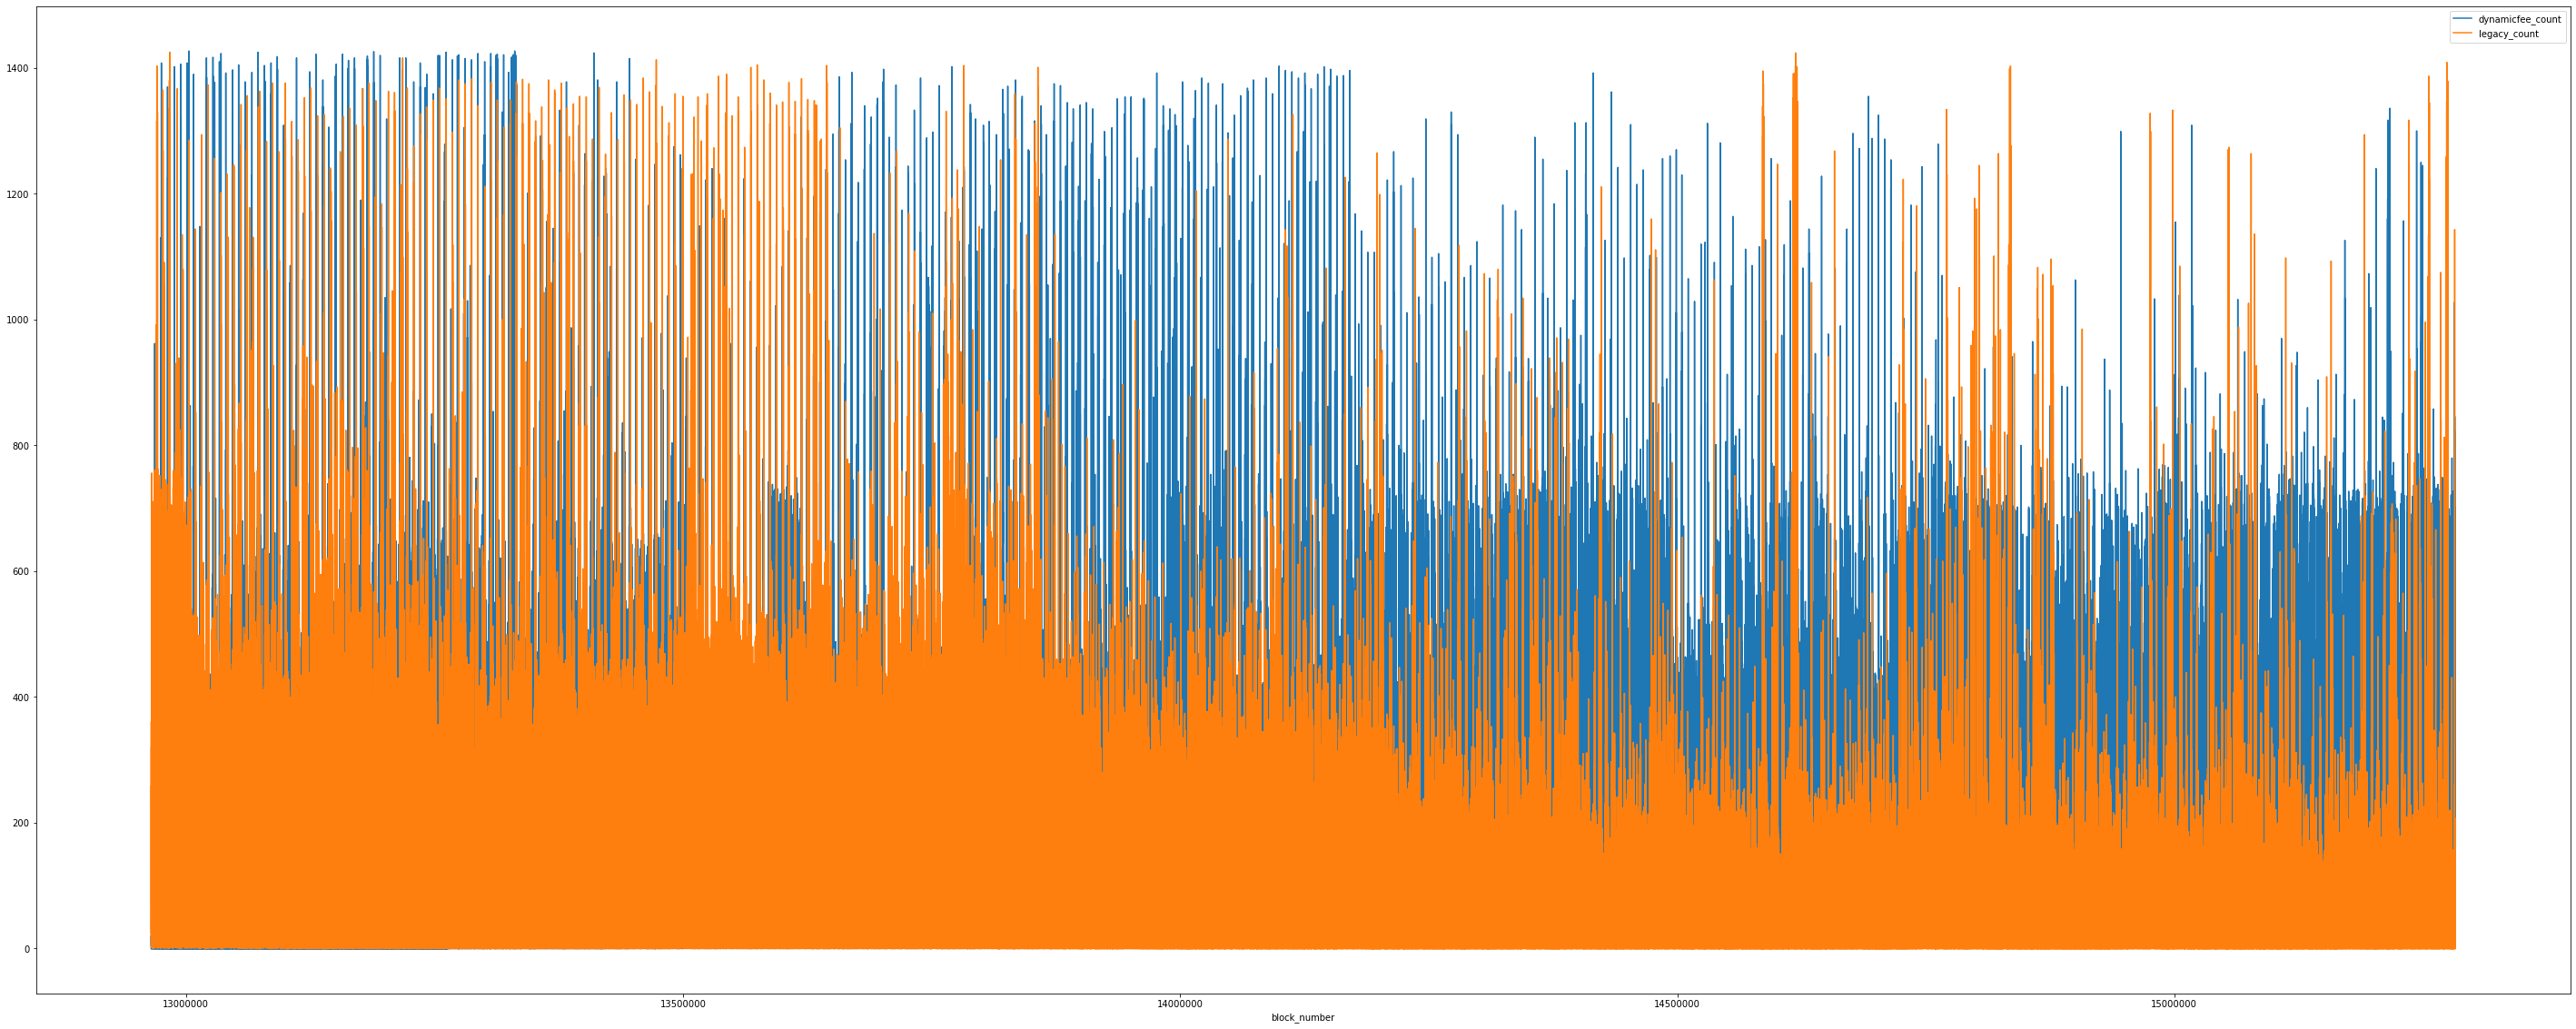

In [8]:
lines = df.plot.line(x='block_number', y=['dynamicfee_count', 'legacy_count'], figsize=(50, 20))
lines.ticklabel_format(useOffset=False, style='plain')

In [63]:
df['dynamicfee_count'].median()


109.0

In [62]:
df['legacy_count'].median()

35.0

In [65]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,block_number,dynamicfee_count,legacy_count
count,2262923.00000,2262923.00000,2262923.00000
mean,14119717.42655,132.09248,58.59310
std,668822.65744,106.37449,75.03983
min,12965000.00000,0.00000,0.00000
25%,13540060.50000,49.00000,14.00000
50%,14117410.00000,109.00000,35.00000
75%,14698604.50000,197.00000,74.00000
max,15282336.00000,1427.00000,1425.00000


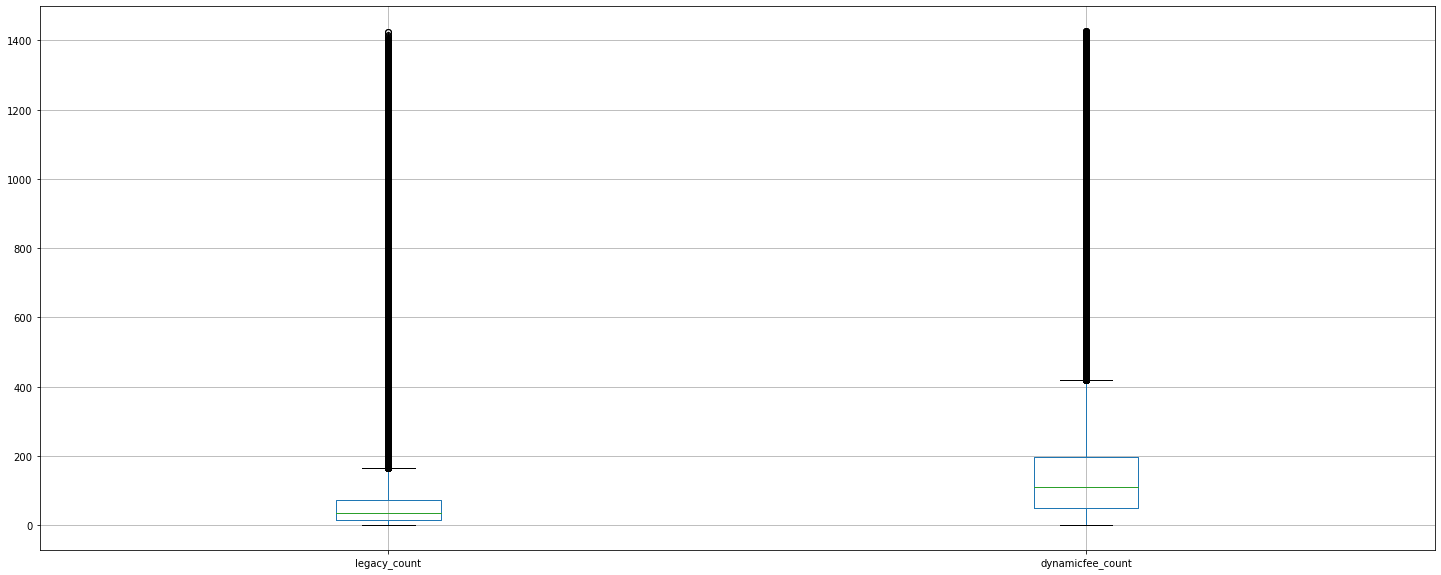

In [60]:
boxplot = df.boxplot(column=['legacy_count', 'dynamicfee_count'], figsize=(25, 10))  